# [Provable Worst Case Guarantees for the Detection of Out-of-Distribution Data](https://arxiv.org/abs/XXXX.XXXX)

**Julian Bitterwolf, Alexander Meinke and Matthias Hein**

**University of Tübingen**

**[https://arxiv.org/abs/XXXX.XXXX](https://arxiv.org/abs/XXXX.XXXX)**

---

## Paper Summary

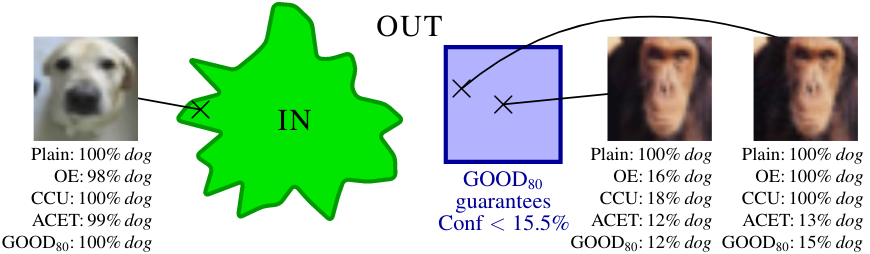

**Left:** On the in-distribution CIFAR-10 all methods have similar high confidence on the image of a *dog*. **Middle:** For the OOD image of a *chimpanzee* from CIFAR-100 the plain model is overconfident. **Right:** When maximizing the confidence inside the $l_\infty$-ball of radius $0.01$ around this image (for the OE model), also CCU and OE become overconfident. ACET and our GOOD\textsubscript{80} perform well in having empirical low confidence, but only GOOD\textsubscript{80} guarantees that the confidence in that $l_\infty$-ball around the middle image is less than 15.5\% for any class (note that $10\%$ corresponds to maximal uncertainty).

### The idea behind provably robust OOD detection

Standard deep neural networks for image classification tend to have high confidence even on out-of-distribution (OOD) inputs that do not belong to any of the available classes.
This is a big problem as low confidence of a classifier when it operates out of its training domain can otherwise be used to trigger human intervention or to let the system try to achieve a safe state when it 'detects' that it is applied outside of its specification.

Deep neural networks are also notoriously susceptible to small adversarial perturbations in the input which change the output: even if a classifier consistently manages to identify samples as not belonging to the in-distribution, it might still assign very high confidence to only marginally perturbed samples from the out-distribution.

The Guaranteed Out-Of-distribution Detection (GOOD) training scheme allows to provide worst-case low confidence guarantees within the neighborhood of an input not only for far away OOD inputs like noise, but also for images from image datasets that are related to the classifier's in-distribution.

Techniques from interval bound propagation allow to derive a provable upper bound on the maximal confidence of the classifier in an $l_\infty$-ball of radius $\epsilon$ around a given point. By minimizing this bound on the out-distribution, we arrive at the first models which have guaranteed low confidence even on image datasets related to the original one; e.g., we get state-of-the-art results on separating letters from EMNIST from digits in MNIST even though the digit classifier has never seen any images of letters at training time. In particular, the guarantees for the training out-distribution generalize to other out-distribution datasets.

In contrast to classifiers with certified adversarial robustness on the in-distribution, GOOD has the desirable property to achieve provable guarantees for OOD detection with almost no loss in accuracy on the in-distribution task.

### Provable confidence bound and loss calculation

For an input $x$, the $l_\infty$-ball of radius $\epsilon$ is described by the upper and lower bounds $\displaystyle\underline{z_0}_\epsilon=x-\epsilon$ and $\overline{z_0}^\epsilon=x+\epsilon$.
With [Interval Bound Propagation (IBP)](https://arxiv.org/abs/1810.12715), these bounds on individual pixels/neurons can be propagated through the neural network as $\displaystyle\overline{z_k}^\epsilon = \max(W_k, 0) \cdot  \overline{z_{k-1}}^\epsilon + \min(W_k, 0)  \cdot \underline{z_{k-1}}_\epsilon + b_k$ for the upper and $\displaystyle\underline{z_k}_\epsilon = \min(W_k, 0) \cdot \overline{z_{k-1}}^\epsilon + \max(W_k, 0) \cdot \underline{z_{k-1}}_\epsilon +b_k$ for the lower bound on the next layer.
Eventually, we arrive at an upper bound  $\displaystyle\overline{f_k(x) - f_l(x)}^\epsilon$ on the difference between the logits of any two classes $k,l$, which means $\displaystyle\max_{\left\lVert\hat{x}-x\right\rVert_\infty \leq \epsilon} f_k(\hat{x}) - f_l(\hat{x}) \leq \overline{f_k(x) - f_l(x)}^\epsilon$.
This translates into an upper bound on the confidence as $\displaystyle\max_{\left\lVert\hat{x}-x\right\rVert_\infty \leq \epsilon} \log  \max_{k=1,\ldots,K}p(\hat{x}) \leq \max_{k=1,\ldots,K} -\log\sum_{l=1}^K e^{-(\overline{f_k(x) - f_l(x)}^\epsilon)}$.
In order to get stable training, GOOD does not minimize this upper bound directly, but uses the loss
$\mathcal{L}_{\text{CUB}}(x; \epsilon) = \log \left( \frac{\Big(\max\limits_{k,l=1,\ldots,K} \overline{f_k(x) - f_l(x)}^\epsilon\Big)^2}{2} + 1 \right)$.
 
Since optimizing guarantees on samples where already the clean confidence is high can be very detrimental, **Quantile GOOD** uses point prediction for inputs which would otherwise receive the worst guarantees. Its complete training objective is the minimization of
 $\displaystyle \frac{1}{N} \sum_{i = 1}^{N} \mathcal{L}_{\text{CE}}(x_i^{\text{IN}},y_i^{\text{IN}}) 
    +  \frac{\kappa}{M} \sum_{j = 1}^{\lfloor q \cdot M \rfloor} \mathcal{L}_{\text{CUB}}(x_{\pi_j}^{\text{OUT}}; \epsilon)
    +  \frac{\kappa}{M} \sum_{j = \lfloor q \cdot M \rfloor + 1}^{M} \mathcal{L}_{\text{CUB}}(x_{\pi_j}^{\text{OUT}}; 0)$.

### Experimental results

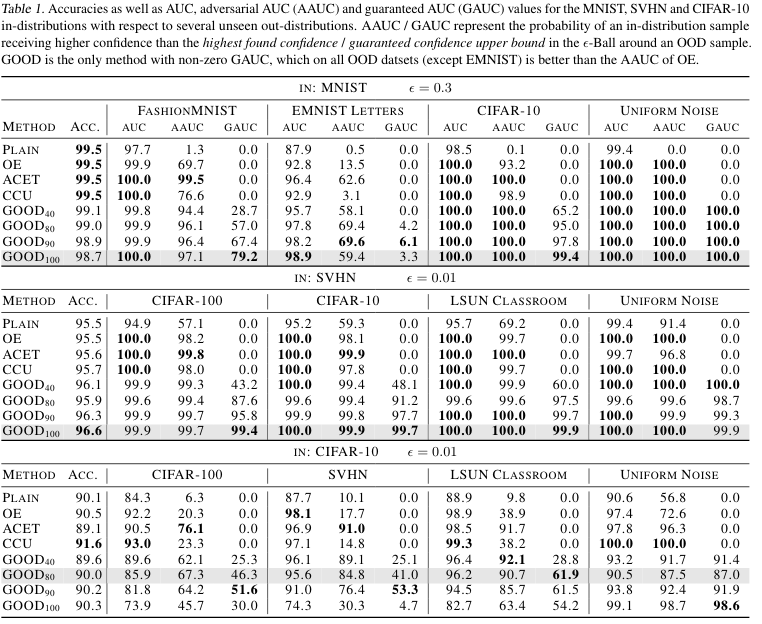

The OOD discrimination performance of GOOD and several baseline methods is shown in Table 1.
<br>GOOD ...
* guarantees generalize to unseen out-distributions
* gives provable guarantees that are better than the empirical worst case of undefended OOD detection methods.
* achieves certified OOD performance with almost no loss in accuracy.
* can be tuned for the trade-off between clean and guaranteed AUC via Quantile GOOD.
* achieves an excellent AUC of 98.9% for the difficult task of distinguishine letters of EMNIST from MNIST digists without ever having seen letters.

---

## Code usage

### Preparations

The code in this repository was written and tested for `Python 3.7`, with the packages listed in `requirements.txt`, notably `torch==1.4.0`, `torchvision==0.5.0`, `numpy==1.18.1`, `scikit-learn==0.22.1`, `scipy==1.4.1` and `tensorboard==2.1.0`.

The dataset locations in `path_config.py` should be adjusted and unavailable datasets can be commented out from `val_loader_out_dicts` and `test_loader_out_dicts` in the `dataloading.py` file.

### Running experiments and evaluations

GOOD models an be trained and evaluated by running `goodX.py` with the appropriate arguments.

Configurations for replicating the experiments discussed in the paper are available in the `run_dataset.sh` files.
As per `schedules.py`, the setting for those arguments with default value `None` depend on the method and dataset if they are not passed as arguments.

The training progress is monitored with tensorboard, which can be viewed in the browser after running `python3.7 -m tensorboard.main --logdir=tb_logs/default/experiments/GOOD_DATASET`.

The trained models together with some extra data like example training images get saved in the experiments folder.
To evaluate models, enter their path in `eval_paths.py` and run `goodX.py`. Evaluation settings for values as in Table 1 are prepared in the `eval_dataset.sh` scripts.